In [52]:
# import warnings
import warnings
warnings.filterwarnings('ignore')
import keras
import matplotlib.pyplot as plt #This package is for plotting
%matplotlib inline  
import numpy as np
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense, Input, Activation
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Linear Regression Model

## Data Preparation

### Loading data and splitting into training and test data

In [7]:
bos_df = datasets.load_boston()

In [18]:
X, y = bos_df.data, bos_df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape)
print(X_test.shape)

(354, 13)
(152, 13)


### Scaling data before input

In [20]:
sc_x = MinMaxScaler()
sc_x.fit(X_train)
sc_x.transform(X_test)

sc_y = MinMaxScaler()
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
sc_y.fit(y_train)
sc_y.transform(y_test)

array([[0.39111111],
       [1.        ],
       [0.4       ],
       [0.07333333],
       [0.36      ],
       [0.33111111],
       [0.34666667],
       [0.30444444],
       [0.24666667],
       [0.30222222],
       [0.08444444],
       [0.27111111],
       [0.22      ],
       [0.12222222],
       [1.        ],
       [0.53333333],
       [0.4       ],
       [0.62888889],
       [0.54222222],
       [0.35555556],
       [0.41777778],
       [0.31333333],
       [0.34222222],
       [0.53555556],
       [0.31777778],
       [0.40222222],
       [0.32444444],
       [0.32      ],
       [0.74888889],
       [0.30444444],
       [0.21333333],
       [0.33333333],
       [0.34444444],
       [0.33555556],
       [0.41333333],
       [0.26222222],
       [0.01333333],
       [1.        ],
       [0.21111111],
       [0.18444444],
       [0.42      ],
       [0.33333333],
       [0.32888889],
       [0.19555556],
       [0.25555556],
       [0.36888889],
       [0.34      ],
       [0.266

## Building Model

In [37]:
def build_model():
    model = Sequential()
    model.add(Dense(13, input_dim = 13, kernel_initializer='normal'))
    model.add(Activation('relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', metrics=['mse'], optimizer='adam')
    return model

In [43]:
model = build_model()

def fit_model():
    return model.fit(X_train, y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

In [28]:
def model_predict():
    y_pred = model.predict(X_test)
    fig, ax = plt.subplots()
    ax.scatter(y_test, y_pred)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.show()

In [50]:
def keras_nn():
    model = build_model()
    fit_model()
    model_predict()

Train on 283 samples, validate on 71 samples
Epoch 1/150
283/283 [==============================] - 0s 841us/step - loss: 23.1869 - mean_squared_error: 23.1869 - val_loss: 22.8186 - val_mean_squared_error: 22.8186
Epoch 2/150
283/283 [==============================] - 0s 44us/step - loss: 23.0180 - mean_squared_error: 23.0180 - val_loss: 22.5838 - val_mean_squared_error: 22.5838
Epoch 3/150
283/283 [==============================] - 0s 53us/step - loss: 22.9919 - mean_squared_error: 22.9919 - val_loss: 22.2056 - val_mean_squared_error: 22.2056
Epoch 4/150
283/283 [==============================] - 0s 50us/step - loss: 23.1094 - mean_squared_error: 23.1094 - val_loss: 22.0490 - val_mean_squared_error: 22.0490
Epoch 5/150
283/283 [==============================] - 0s 46us/step - loss: 23.0594 - mean_squared_error: 23.0594 - val_loss: 22.3436 - val_mean_squared_error: 22.3436
Epoch 6/150
283/283 [==============================] - 0s 51us/step - loss: 23.0469 - mean_squared_error: 23.0469 

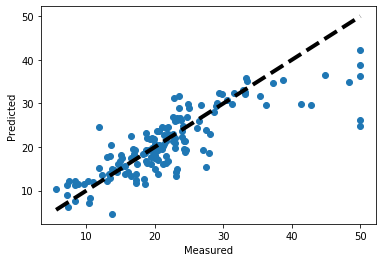

In [51]:
keras_nn()

# Logistic Regression